In [1]:
import pandas as pd
import numpy as np

# How to do ANOVA in python?
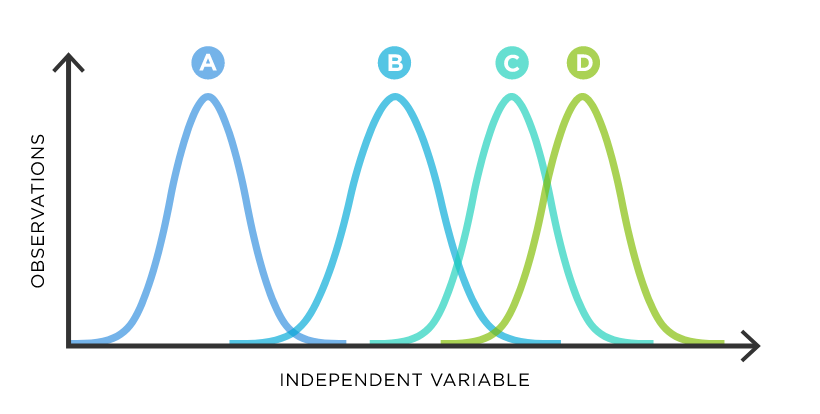

Overview: 
- what is? 
- types
- how it works? 
- examples
- python 

# ANOVA (analysis of variance)
##  what is?
ANOVA(https://en.wikipedia.org/wiki/Analysis_of_variance) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means.
The ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

##  Types

The two simplest scenarios are:

- ### one-way ANOVA for comparing 3(+) groups on 1 variable: 
     Example : do all children from school A, B and C have equal mean IQ scores? 

- ### two-ways/ repeated measures ANOVA for comparing 3(+) variables in 1 group: 
    Example: is the mean rating for beer A, B and C equal for all people?


### How it works? 

###### Hypotheses
- Null hypothesis: Groups means are equal (no variation in means of groups)
    H0: μ1=μ2=…=μp
- Alternative hypothesis: At least, one group mean is different from other groups
    H1: All μ are not equal




 #### Assumptions 
- Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
- Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)
- Observations are sampled independently from each other.

     #### (Activity 1) Check the conditions for the ANOVA test for each example)


###### How ANOVA works?
- Check sample sizes: equal number of observation in each group
- Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
- Calculate Mean Square error (MSE) (SS error/df of residuals)
- Calculate F value (MS of group/MSE)
    #### (Activity 2) Do the step by step for each example. 

# Time for equations (not yet?)


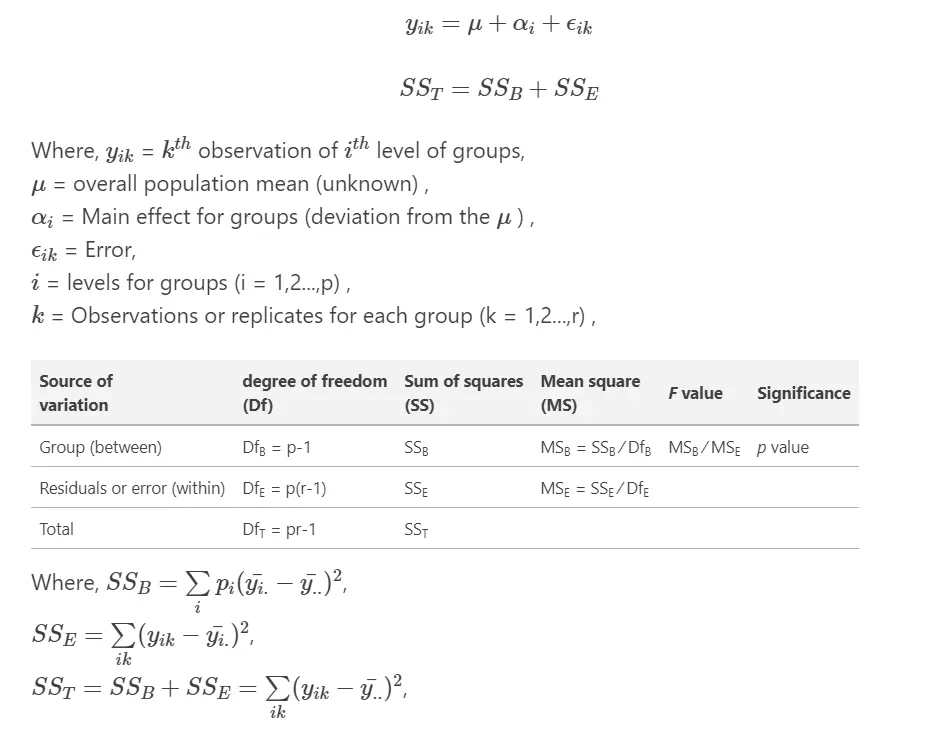

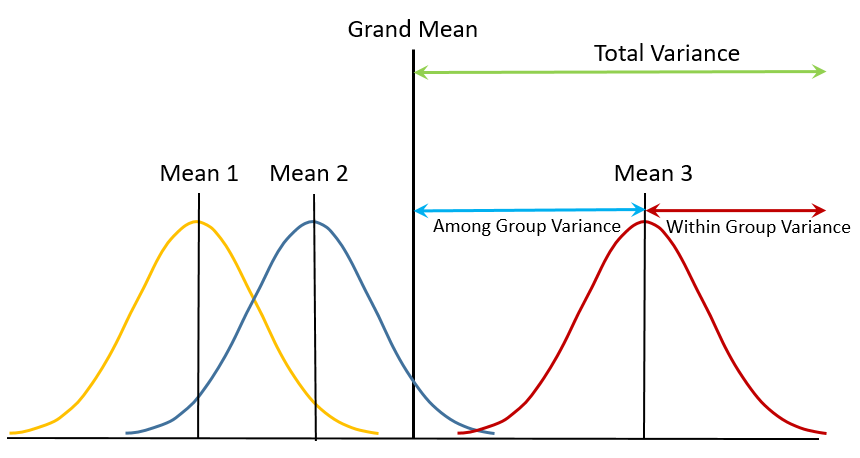

# EXAMPLE (1 way i.e there is only one independent variable)

In [2]:
# load data file
df = pd.read_csv("onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable and termed as factor. As there are four types of treatments, treatment factor has four levels.

For this experimental design, there is only factor (treatments) or independent variable to evaluate, and therefore, one-way ANOVA method is suitable for analysis.

In [3]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [4]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


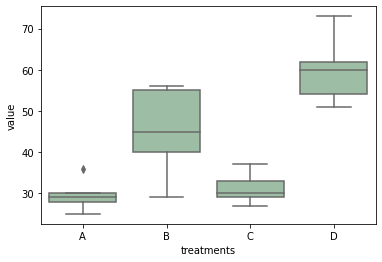

In [5]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
# ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()


In [6]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [7]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


#  Interpretation
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments

# EXAMPLE (2 ways  i.e there two (could be more) independent variables)

From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Genotypes and years has five and three levels respectively (see one-way ANOVA to know factors and levels).

For this experimental design, there are two factors to evaluate, and therefore, two-way ANOVA method is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants. If you apply one-way ANOVA here, you can able to evaluate only one factor at a time.

From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

In [8]:
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


In [9]:
d

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


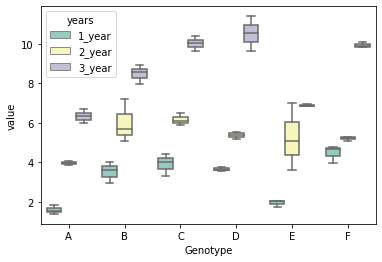

In [10]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [11]:
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


# Interpretation
The p value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (p<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

As the interaction is significant, let’s visualize the interaction plot (also called profile plot) for interaction effects,

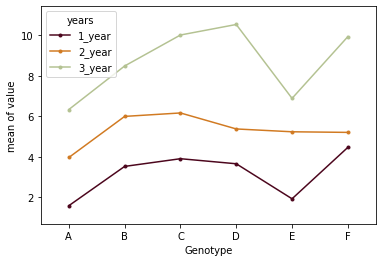

In [12]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

- The interaction plot helps to visualize the means of the response of the two factors (Genotype and years) on one graph. Generally, the X-axis should have a factor with more levels.
- From the interaction plot, the interaction effect is significant between the Genotype and years because three lines are not parallel (roughly parallel factor lines indicate no interaction - additive model). This interaction is also called ordinal interaction as the lines do not cross each other.
- For a more reliable conclusion of the interaction plot, it should be verified with the F test for interaction


# Step-by-Step 1-Way ANOVA from scratch

We will follow an example on pizza delivery times. Imagine that we have ordered pizza many times at 3 different pizza companies — A, B, and C — and we have measured delivery times.

# Question: There's any difference or it doesn't matter from which one I order?

In [13]:
A = [12.6, 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]

In [14]:
all_scores = A + B + C
company_names = (['A'] * len(A)) +  (['B'] * len(B)) +  (['C'] * len(C))

In [15]:
data = pd.DataFrame({'company': company_names, 'score': all_scores})
data

,company,score
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


## Descriptives

In [16]:
data.groupby('company').mean()

,score
company,
A,12.542857
B,11.533333
C,11.825000


The ANOVA model starts by estimating the total amount of variation that exists in the pizza delivery times (this is why it is called Analysis of Variance).
Looking at our sample, we could say that pizza delivery times range from 8,9 minutes to 14,0 minutes. If we ignore the information about the company, the best estimation we could give for a new pizza delivery is between 8,9 and 14 minutes. Let’s for now call this total variation.


The next step is to split this total variation in two: Between-Group Variation and Within-Group Variation


Between-Group Variation is Explained by our Variable Company
If we add the variable company in the graph, we see that if we know which company delivers our pizza, we can give a more precise range of delivery times.
- If company A delivers, it takes between 11,8 and 14 minutes.
- If company B delivers, it takes between 10,0 and 14,0 minutes.
- If company C delivers, it takes between 8,9 and 13,6 minutes.

This phenomenon is due to the Between-Group variation: a quantification of the variation explained by our variable.

Within-Group Variation is not Explained by our Variable Company

However, there is also some part of variation that cannot be explained by our variable ‘Company’: we still don’t know why there is a difference between 11,8 and 14 in company A’s delivery times and we would need more variables to explain this.

Since we do not have those new variables, the variation remains unexplained and is called the within-group variation.


ANOVA: hypothesis test for group differences.

When the total variation is split in two, a hypothesis test is applied to find out whether the observed differences in our sample of 21 is significant:
Is one pizza company systematically faster, or is this random noise due to the sampling effect?


We need a statistical test to give us this answer: the ANOVA F-test!!!


##    1-Way ANOVA Using StatsModels

In [17]:
lm = ols('score ~ company',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq   mean_sq         F    PR(>F)
company    2.0   3.606905  1.803452  0.821297  0.455683
Residual  18.0  39.525476  2.195860       NaN       NaN


# Checking conditions

1. Normality

In [18]:
lm.resid

0     0.057143
1    -0.542857
2    -0.742857
3    -0.642857
4     0.457143
5    -0.042857
6     1.457143
7    -1.533333
8    -1.333333
9    -1.533333
10    0.466667
11    2.466667
12    1.466667
13   -1.725000
14    1.175000
15    1.575000
16    1.075000
17   -2.925000
18   -1.125000
19    1.775000
20    0.175000
dtype: float64

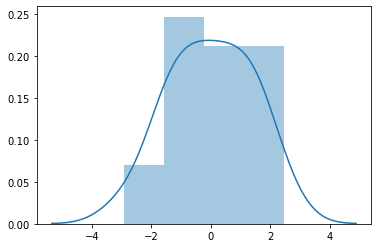

In [19]:
 sns.distplot(lm.resid)

is there any other way to check this out?

In [20]:
# Shapiro-Wilk normality test 
stats.shapiro(lm.resid)

ShapiroResult(statistic=0.973912239074707, pvalue=0.8171384334564209)

2. Variance

In [21]:
sigma_A =np.var(A)

In [22]:
sigma_B =np.var(B)

In [23]:
sigma_C =np.var(C)

In [24]:
sigma_A == sigma_B == sigma_C

False

How can we check that indeed are the same?

In [25]:
# Levene variance test  please check the variances differences between the groups
stats.levene(A,B,C)

LeveneResult(statistic=2.4581932466013776, pvalue=0.11379870039790575)

3. Assume that the observations are independently sampled. 

##   1-Way ANOVA by hand (from scratch)

In [26]:
# compute overall mean
overall_mean = data['score'].mean()
overall_mean

11.980952380952381

In [27]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
ss_total

43.132380952380956

In [28]:
# compute group means
group_means = data.groupby('company').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

,group_mean,overall_mean
company,,
A,12.542857,11.980952
B,11.533333,11.980952
C,11.825000,11.980952


In [29]:
# add group means and overall mean to the original data frame
data = data.merge(group_means,how='inner', left_on = 'company', right_index = True)

In [30]:
data

,company,score,overall_mean_x,group_mean,overall_mean_y
0,A,12.6,11.980952,12.542857,11.980952
1,A,12.0,11.980952,12.542857,11.980952
2,A,11.8,11.980952,12.542857,11.980952
3,A,11.9,11.980952,12.542857,11.980952
4,A,13.0,11.980952,12.542857,11.980952
5,A,12.5,11.980952,12.542857,11.980952
6,A,14.0,11.980952,12.542857,11.980952
7,B,10.0,11.980952,11.533333,11.980952
8,B,10.2,11.980952,11.533333,11.980952
9,B,10.0,11.980952,11.533333,11.980952


In [32]:
# compute Sum of Squares Residual
ss_residual = sum((data['score'] - data['group_mean'])**2)
ss_residual

39.52547619047619

In [36]:
# compute Sum of Squares Model
ss_explained = sum((data['group_mean'] - data['overall_mean_x'])**2)
ss_explained

3.6069047619047776

In [34]:
# compute Mean Square Residual
n_groups = len(set(data['company']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

2.1958597883597886

In [39]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

1.8034523809523888

F Statistic
We use the Mean Squares to compute the F statistic as the ratio between explained vs unexplained variation:

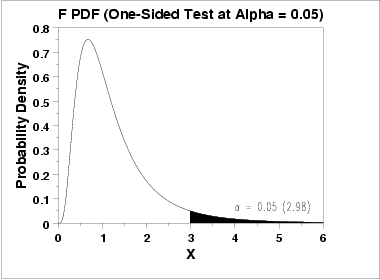

In [40]:
# compute F-Value
f = ms_explained / ms_residual
f

0.8212966923081592

We compute the P-Value using the F distribution with df1 and df2 degrees of freedom, in our case an F(2, 18) distribution. Using probability calculation, we find the p-value as follows:

In [41]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.4556832940515221

#  Applying ANOVA but... the conditions?

Apply one way ANOVA
Test for normality/variance criteria

The assumptions for implementing one way ANOVA include (as in independent sample t-test):

The normality criterion: each group compared should come from a population following the normal distribution.

The variance criterion (or 'homogeneity of variances'): samples should come from populations with the same variance.

Independent samples: performance (the dependent variable) in each sample should not be affected by the conditions in other samples.

In [43]:
# Shapiro-Wilk normality test 
stats.shapiro(dC), stats.shapiro(dT1), stats.shapiro(dT2) 

NameError: name 'dC' is not defined

https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [46]:
 #create DataFrame to hold data
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a', 'b', 'c'], repeats=10)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b      8.4 0.0158   1.4272 15.3728   True
     a      c      1.3 0.8864  -5.6728  8.2728  False
     b      c     -7.1 0.0453 -14.0728 -0.1272   True
-----------------------------------------------------


In [47]:
pip install --upgrade pingouin

Requirement already up-to-date: pingouin in /Users/andressaldana/opt/anaconda3/lib/python3.8/site-packages (0.3.10)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pingouin as pg

In [49]:

# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[ np.random.normal(5.4, size=n),
                    np.random.normal(5.8, size=n),
                    np.random.normal(6.4, size=n) ]

# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})

In [50]:
df

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


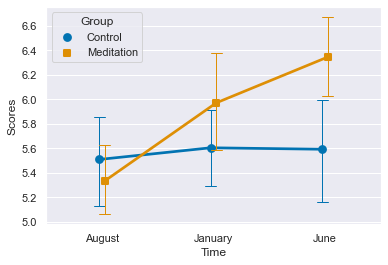

In [51]:
import seaborn as sns
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True, markers=['o', 's'],
     capsize=.1, errwidth=1, palette='colorblind')

In [52]:
df.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std']).round(2)

mean   std
Time    Group                 
August  Control     5.51  1.03
        Meditation  5.33  0.81
January Control     5.60  0.90
        Meditation  5.97  1.07
June    Control     5.59  1.18
        Meditation  6.35  0.93

In [53]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        4.465      1     58  4.465  4.131    0.047  0.066  nan
Time         9.359      2    116  4.679  4.941    0.009  0.078    0.998
Interaction  6.539      2    116  3.270  3.452    0.035  0.056  nan



In [54]:
posthocs = pg.pairwise_ttests(dv='Scores', within='Time', between='Group',
                              subject='Subject', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T     dof  Tail         p-unc    BF10    hedges
------------  -------  -------  ----------  --------  ------------  ------  ------  ---------  -------  ------  --------
Time          -        August   January     True      True          -2.002  59.000  two-sided    0.050   0.908    -0.379
Time          -        August   June        True      True          -2.985  59.000  two-sided    0.004   7.594    -0.530
Time          -        January  June        True      True          -1.024  59.000  two-sided    0.310   0.232    -0.170
Group         -        Control  Meditation  False     True          -2.033  58.000  two-sided    0.047   1.447    -0.518
Time * Group  August   Control  Meditation  False     True           0.733  58.000  two-sided    0.466   0.329     0.187
Time * Group  January  Control  Meditation  False     True          -1.434  58.000  two-sided    0.157   0.619    -0.365
Time * Group  J